In [1]:
import re
import numpy as np 
from tqdm import tqdm 
import matplotlib.pyplot as plt 
from openTSNE import TSNE
from sklearn.decomposition import PCA
import pandas as pd 
from tqdm import tqdm

 
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, auc
from openTSNE import TSNE

# from sklearn.manifold import TSNE
from openTSNE import TSNE
from gensim.models import Word2Vec
import networkx as nx 
from matplotlib.lines import Line2D
import pickle 
%matplotlib inline


# Compare Baseline

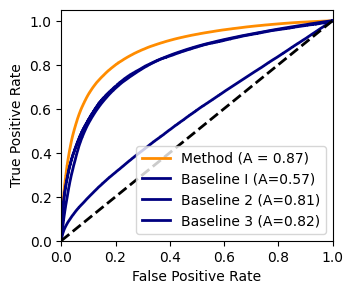

In [4]:
fpr_baseline_1 = np.load("saved_files/fpr_baseline_1.npy")
tpr_baseline_1 = np.load("saved_files/tpr_baseline_1.npy")

fpr_baseline_2 = np.load("saved_files/fpr_baseline_2.npy")
tpr_baseline_2 = np.load("saved_files/tpr_baseline_2.npy")

fpr_baseline_3 = np.load("saved_files/fpr_baseline_3.npy")
tpr_baseline_3 = np.load("saved_files/tpr_baseline_3.npy")

fpr_method = np.load("saved_files/fpr_method.npy")
tpr_method = np.load("saved_files/tpr_method.npy")


plt.figure(figsize=(3.5, 3))
plt.plot(fpr_method, tpr_method, color='darkorange', lw=2, label='Method (A = %0.2f)' % auc(fpr_method, tpr_method))
plt.plot(fpr_baseline_1, tpr_baseline_1, color='navy', lw=2, label='Baseline I (A=%0.2f)' % auc(fpr_baseline_1, tpr_baseline_1))
plt.plot(fpr_baseline_2, tpr_baseline_2, color='navy', lw=2, label='Baseline 2 (A=%0.2f)' % auc(fpr_baseline_2, tpr_baseline_2))
plt.plot(fpr_baseline_3, tpr_baseline_3, color='navy', lw=2, label='Baseline 3 (A=%0.2f)' % auc(fpr_baseline_3, tpr_baseline_3))


plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# plt.show()

# plt.savefig("roc.pdf", format="pdf", bbox_inches="tight")


In [ ]:
stop

In [ ]:
def keep_words_with_underscore(input_string):
    # Define a regular expression pattern to match words with underscores
    pattern = r'\b\w*_[\w_]*\b'

    # Use re.findall to extract words that match the pattern
    matching_words = re.findall(pattern, input_string)

    # Join the matching words to form the final string
    result = ' '.join(matching_words)

    return result

def flatten_matrix(matrix):
    flat = []
    for r in matrix:
        # for c in r:
        flat += r
    return np.unique(flat)


def compute_word_count_subset(corpus, subset_words):
    
    for document in tqdm(corpus):
        for word in document:
            if word in subset_words:
                subset_words[word] += 1
    return subset_words

In [ ]:
ngram_abstracts = np.load("saved_files/ngram_abstracts.npy", mmap_mode="r")
concept_arr = np.unique(np.load("saved_files/overlapping_concepts.npy"))
year_arr = np.load("saved_files/year_arr.npy", mmap_mode="r")

c_inx_arr = np.memmap("saved_files/embedding_concept_arr.dat",shape=(10235,), dtype="<U55")
c_encoding_arr = np.memmap("saved_files/embedding_vector_arr.dat",shape=(10235, 30, 128), dtype=np.float64)


In [ ]:
# Compute word count for the subset of words 
word_count_subset = compute_word_count_subset([row.split() for row in ngram_abstracts], {k:0 for k in np.unique(concept_arr)})

def filter_dict_by_occurrence(word_count_dict, n):
    return {word: count for word, count in word_count_dict.items() if count > n}

filtered_concept_dict = np.array(list(filter_dict_by_occurrence(word_count_subset, 4).keys()))

ocurr_arr = {}
for abstract, year in tqdm(zip(ngram_abstracts, year_arr)):
    temp = keep_words_with_underscore(abstract)
    if year not in ocurr_arr:
        ocurr_arr[year] = []
    if temp.count(" ") > 0:
        temp = temp.split(" ") 
        temp = [s for s in temp if s in filtered_concept_dict]
        l = [list(filter(("_").__ne__, temp))]
        ocurr_arr[year].extend(l)

new_ocurr_arr = {}
for year in tqdm(np.unique(year_arr)):
    new_ocurr_arr[year] = flatten_matrix(ocurr_arr[year])

100%|██████████| 66839/66839 [00:00<00:00, 223749.28it/s]
66839it [00:07, 8575.93it/s] 
100%|██████████| 30/30 [00:00<00:00, 133.69it/s]


In [ ]:
# Dictionary to store the first occurrence year of each word
first_occurrences = {}

# Dictionary to count the number of first occurrences per year
new_words_per_year = {}

# Iterate through the years in sorted order
for year in sorted(new_ocurr_arr.keys()):
    new_words_count = 0
    for word in new_ocurr_arr[year]:
        if word not in first_occurrences:
            first_occurrences[word] = year
            new_words_count += 1
    new_words_per_year[year] = new_words_count

years = sorted(new_words_per_year.keys())
cumulative_sum = [sum(new_words_per_year[y] for y in years if y <= year) for year in years]

# Papers per year

Text(0, 0.5, 'Tracked Concepts')

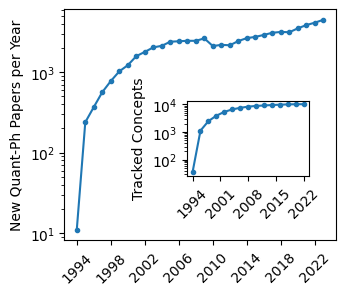

In [ ]:
years, numpapers_y = np.unique(year_arr,return_counts=True)
fig, ax = plt.subplots(figsize=(3.5,3))

ax.plot( np.arange(len(numpapers_y))[:], numpapers_y[:], '-o', markersize=3 )
ax.set_xticks( list(range(len(years))[::4]))
ax.set_xticklabels( years[::4], rotation=45 )
ax.set_yscale("log")
ax.set_ylabel("New Quant-Ph Papers per Year")

ax2 = fig.add_axes([0.475, 0.25+0.075, 0.25+0.1, 0.25])
ax2.plot(np.arange(len(numpapers_y))[:-1][::2], cumulative_sum[:-1][::2], '-o', markersize=3)

ax2.set_xticks( list(range(len(years))[::7]))
ax2.set_xticklabels( years[::7], rotation=45 )
ax2.set_yscale("log")
ax2.set_ylabel("Tracked Concepts")


# Distance between same concept between years in Encoding 

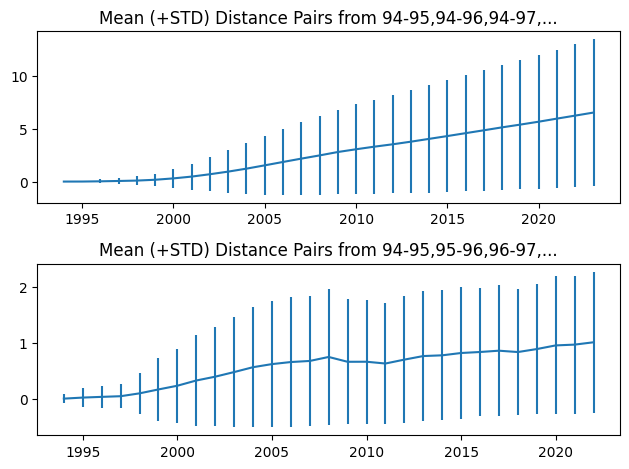

In [ ]:
def euclidean_distance(v1, v2):
    return np.linalg.norm(v1 - v2, axis=-1)


plot_arr_from_0 = np.zeros((len(np.unique(year_arr)),len(c_encoding_arr)))
plot_arr_from_1 = np.zeros((len(np.unique(year_arr))-1,len(c_encoding_arr)))

for i,inx in enumerate(range(0,len(np.unique(year_arr)))):
    plot_arr_from_0[i] =  [euclidean_distance(e[0,:], e[inx,:])for e in c_encoding_arr]

for i,inx in enumerate(range(0,len(np.unique(year_arr))-1)):
    plot_arr_from_1[i] =  [euclidean_distance(e[inx,:], e[inx+1,:])for e in c_encoding_arr]


fig, axs = plt.subplots(2)
axs[0].errorbar(np.unique(year_arr), np.mean(plot_arr_from_0,axis=-1), yerr=np.std(plot_arr_from_0,axis=-1))
axs[1].errorbar(np.unique(year_arr)[:-1], np.mean(plot_arr_from_1,axis=-1), yerr=np.std(plot_arr_from_1,axis=-1))

axs[0].title.set_text('Mean (+STD) Distance Pairs from 94-95,94-96,94-97,...')
axs[1].title.set_text('Mean (+STD) Distance Pairs from 94-95,95-96,96-97,...')
fig.tight_layout()

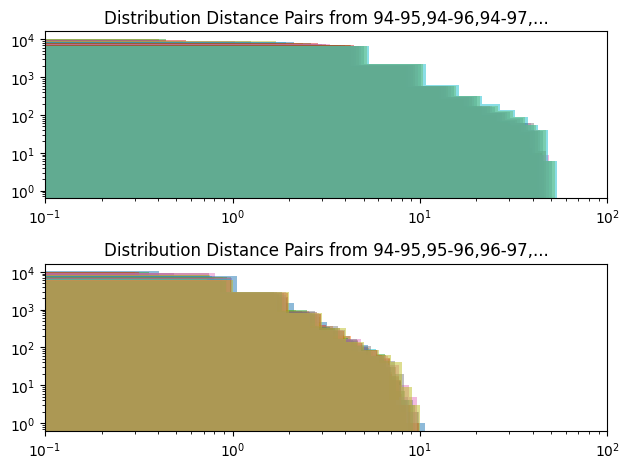

In [ ]:
fig, axs = plt.subplots(2)

for i in plot_arr_from_0:
    axs[0].hist(i,alpha=0.5)


for i in plot_arr_from_1:
    axs[1].hist(i,alpha=0.5)

axs[0].title.set_text('Distribution Distance Pairs from 94-95,94-96,94-97,...')
axs[1].title.set_text('Distribution Distance Pairs from 94-95,95-96,96-97,...')

axs[0].set_yscale("log")
axs[0].set_xscale("log")
axs[0].set_xlim(10**(-1),100)
axs[1].set_yscale("log")
axs[1].set_xscale("log")
axs[1].set_xlim(10**(-1),100)
fig.tight_layout()

In [ ]:
print_dt = {}

for cnt, i in enumerate(plot_arr_from_0):
    
    args = np.argsort(i)[::-1][:5]
    val = np.sort(i)[::-1][:5]
    words = c_inx_arr[args]
    
    print_dt[np.unique(years)[cnt]] = words

df = pd.DataFrame()
for year, concepts in print_dt.items():
    df[year] = concepts

print(df)

                    1994                 1995              1996  \
0              ab_effect     quantum_mechanic     hilbert_space   
1            zx_calculus        hilbert_space       phase_space   
2  zitterbewegung_effect          phase_space   squeezed_vacuum   
3                zig_zag      squeezed_vacuum  quantum_mechanic   
4          zeta_function  projection_operator     photon_number   

                    1997                 1998                      1999  \
0            phase_shift          phase_shift       projection_operator   
1         relative_phase       dirac_equation      quantum_cryptography   
2          photon_number     quantum_mechanic  quantum_key_distribution   
3        squeezed_vacuum          phase_space          quantum_mechanic   
4  anharmonic_oscillator  projection_operator             photon_number   

                       2000                      2001               2002  \
0  nonlinear_coherent_state             casimir_force      casimir_for

In [ ]:

# def euclidean_distance(v1, v2):
#     return np.linalg.norm(v1 - v2, axis=-1)

# # Load data
# encoding_arr = np.load("c_encoding_arr.npy")
# years = np.load("saved_files/year_arr.npy")
# conc_arr = np.load("c_inx_arr.npy")

# # Get the number of unique years and number of concepts
# num_years = encoding_arr.shape[1]
# num_concepts = encoding_arr.shape[0]

# # Create a dictionary of concept embeddings indexed by year
# yearly_embeddings = {}
# for year_index, year in enumerate(np.unique(years)):
#     yearly_embeddings[year] = encoding_arr[:, year_index, :]

# # Initialize arrays to store aggregated statistics
# mean_distances_0 = []
# std_distances_0 = []
# mean_distances_1 = []
# std_distances_1 = []

# # Compute distances without repetition for each year and aggregate statistics
# for year_index, year in tqdm(enumerate(np.unique(years))):
#     distances = []
    
#     embeddings_dict = {i: encoding_arr[:,year,:][i] for i in range(encoding_arr[:,year,:].shape[0])}
#     for j in range(num_concepts):
#         for k in range(j + 1, num_concepts):
#             encoding_pair = np.concatenate((embeddings_dict[j], embeddings_dict[k]),axis=-1)
            
#             distances.append(euclidean_distance())


#     mean_distances_0.append(np.mean(distances))δt
#     std_distances_0.append(np.std(distances))

# # Compute distances without repetition for consecutive years and aggregate statistics
# # for i in tqdm(range(num_years - 1)):
# #     distances = []
# #     for j in range(num_concepts):
# #         for k in range(num_concepts):
# #             distances.append(euclidean_distance(encoding_arr[j, i], encoding_arr[j, i + 1]))
# #     mean_distances_1.append(np.mean(distances))
# #     std_distances_1.append(np.std(distances))

# # Plotting
# fig, axs = plt.subplots(2)
# axs[0].errorbar(np.unique(years), mean_distances_0, yerr=std_distances_0)
# axs[1].errorbar(np.unique(years)[:-1], mean_distances_1, yerr=std_distances_1)

# axs[0].set_title('Mean (+STD) Distance Pairs from 94-95,94-96,94-97,...')
# axs[1].set_title('Mean (+STD) Distance Pairs from 94-95,95-96,96-97,...')
# fig.tight_layout()

# plt.show()


In [ ]:
# def euclidean_distance(v1, v2):
#     return np.linalg.norm(v1 - v2, axis=-1)

# encoding_arr = np.load("c_encoding_arr.npy")
# years = np.load("saved_files/year_arr.npy")
# conc_arr = np.load("c_inx_arr.npy")

# # Get the number of unique years and number of concepts
# num_years = encoding_arr.shape[1]
# num_concepts = encoding_arr.shape[0]

# # Initialize arrays to store aggregated statistics
# mean_distances_0 = []
# std_distances_0 = []
# mean_distances_1 = []
# std_distances_1 = []

# # Compute distances without repetition for each year and aggregate statistics
# for year_index in tqdm(range(num_years)):
#     distances = []
#     for j in range(num_concepts):
#         for k in range(j + 1, num_concepts):
#             distances.append(euclidean_distance(encoding_arr[j, year_index], encoding_arr[k, year_index]))
#     mean_distances_0.append(np.mean(distances))
#     std_distances_0.append(np.std(distances))

# # Compute distances without repetition for consecutive years and aggregate statistics
# for i in tqdm(range(num_years - 1)):
#     distances = []
#     for j in range(num_concepts):
#         for k in range(num_concepts):
#             distances.append(euclidean_distance(encoding_arr[j, i], encoding_arr[j, i + 1]))
#     mean_distances_1.append(np.mean(distances))
#     std_distances_1.append(np.std(distances))



# fig, axs = plt.subplots(2)
# axs[0].errorbar(np.unique(years), np.mean(plot_arr_from_0,axis=-1), yerr=np.std(plot_arr_from_0,axis=-1))
# axs[1].errorbar(np.unique(years)[:-1], np.mean(plot_arr_from_1,axis=-1), yerr=np.std(plot_arr_from_1,axis=-1))

# axs[0].title.set_text('Mean (+STD) Distance Pairs from 94-95,94-96,94-97,...')
# axs[1].title.set_text('Mean (+STD) Distance Pairs from 94-95,95-96,96-97,...')
# fig.tight_layout()

# Cluster

In [ ]:
def mbkmeans_clusters(
	X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_




model = Word2Vec.load("saved_models/re_model_year_{}.model".format(2023)) 
encoding_arr = np.array([model.wv.get_vector(w) for w in filtered_concept_dict])

In [ ]:
clustering, cluster_labels = mbkmeans_clusters(
	X=encoding_arr,
    k=50,
    mb=500,
    print_silhouette_values=True,
)

/home/felix/vscodeProjects/arxiv_nlp/arxiv_venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For n_clusters = 50
Silhouette coefficient: -0.05
Inertia:779228.875
Silhouette values:
    Cluster 3: Size:4067 | Avg:0.12 | Min:0.02 | Max: 0.20
    Cluster 21: Size:1850 | Avg:-0.08 | Min:-0.14 | Max: 0.01
    Cluster 6: Size:38 | Avg:-0.08 | Min:-0.30 | Max: 0.13
    Cluster 38: Size:400 | Avg:-0.14 | Min:-0.28 | Max: 0.01
    Cluster 8: Size:114 | Avg:-0.14 | Min:-0.30 | Max: 0.01
    Cluster 2: Size:295 | Avg:-0.14 | Min:-0.29 | Max: 0.02
    Cluster 10: Size:495 | Avg:-0.15 | Min:-0.33 | Max: 0.05
    Cluster 25: Size:38 | Avg:-0.17 | Min:-0.32 | Max: -0.04
    Cluster 5: Size:7 | Avg:-0.18 | Min:-0.69 | Max: 0.09
    Cluster 22: Size:43 | Avg:-0.18 | Min:-0.44 | Max: 0.05
    Cluster 17: Size:363 | Avg:-0.19 | Min:-0.39 | Max: 0.03
    Cluster 48: Size:36 | Avg:-0.20 | Min:-0.46 | Max: -0.00
    Cluster 23: Size:145 | Avg:-0.20 | Min:-0.39 | Max: -0.00
    Cluster 43: Size:36 | Avg:-0.20 | Min:-0.40 | Max: -0.02
    Cluster 36: Size:60 | Avg:-0.20 | Min:-0.41 | Max: 0.03
    Cl

Most representative terms per cluster (based on centroids):
Cluster 0: entanglement bipartite multipartite_state 
Cluster 1: quantum_phase_transition thermodynamic_limit antiferromagnetic 
Cluster 2: secure_key_distribution quantum_key_distribution vernam_cipher 
Cluster 3: cantorus trm ngt 
Cluster 4: open_system open_quantum_system dynamic 
Cluster 5: smooth_min_entropy max_entropy dpi 
Cluster 6: unsupervised_machine_learning machine_learning deep_learning 
Cluster 7: estimation collective_measurement measurement 
Cluster 8: quantum_computational_algorithm qcpu combinatorial_search_problem 
Cluster 9: superconducting_transition_edge_sensor photon_detection single_photon_detection 
Cluster 10: hughstons quadratic_differential ac_phase 
Cluster 11: quantum_nonlinear_oscillator parametric_oscillator limit_cycle 
Cluster 12: canonical_coherent_state perelomov klauder 
Cluster 13: spin_coherence rare_earth_ion long_coherence_time 
Cluster 14: combinatorial_optimization_problem optimizati

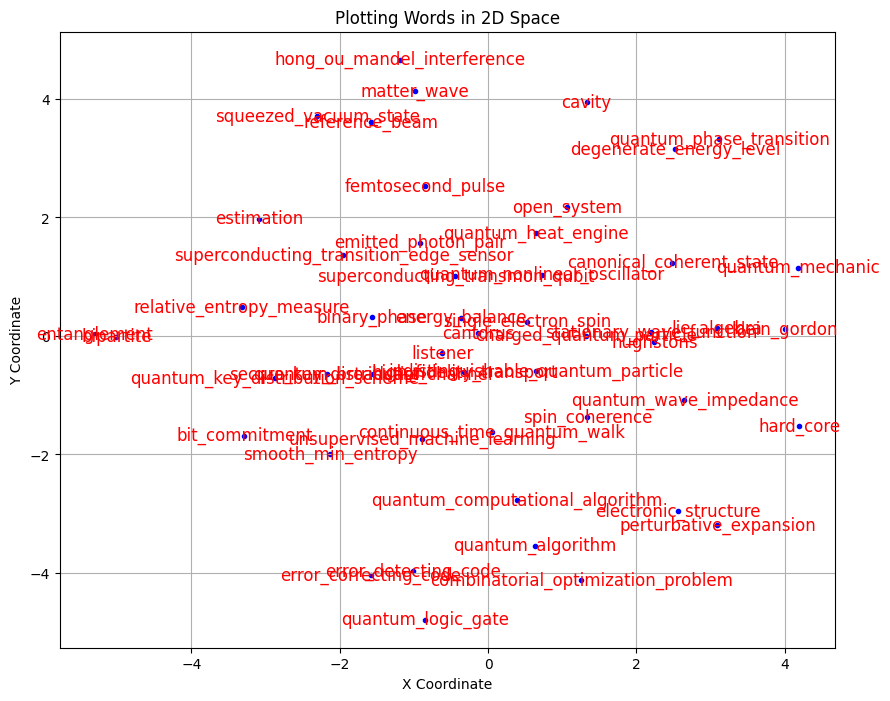

In [ ]:
print("Most representative terms per cluster (based on centroids):")
vec_arr = []
word_arr = []
for i in range(50):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=3)
    vec_arr.append(clustering.cluster_centers_[i])
    word_arr.append(most_representative[0][0])
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")
vec_arr = np.array(vec_arr)
word_arr = np.array(word_arr)

embed = TSNE(n_components=2, random_state=42, perplexity=10,n_iter=1000).fit(vec_arr)
x_coords = embed[:,0]
y_coords = embed[:,1]

# Create the plot
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, color='blue', marker='.')

# Plot each word at its respective coordinate
for (x, y), word in zip(embed, word_arr):
    plt.text(x, y, word, fontsize=12, ha='center', va='center', color='red')

# Set plot titles and labels
plt.title('Plotting Words in 2D Space')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Show grid
plt.grid(True)

# Show plot
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from openTSNE import TSNE

# def plot_words_in_2d_space(words):
#     """
#     Plots each word at its respective 2D coordinate.
    
#     Parameters:
#     coordinates (list of tuples): List of (x, y) pairs where each word should be plotted.
#     words (list of str): List of words to be plotted at each coordinate.
#     """

#     plt.figure(figsize=(10, 8))
#     for year in np.unique(year_arr):
#         Word2Vec.load("saved_models/model_year_{}.model".format(year))
#         vec_arr = []
#         for cnt, w in enumerate(words):
#             vec_arr.append(model.wv.get_vector(w))
#         vec_arr = np.array(vec_arr)
        
#         embed = TSNE(n_components=2, random_state=42, perplexity=10,n_iter=1000).fit(vec_arr)
            
    
#         # Extract x and y coordinates
#         x_coords = embed[:,0]
#         y_coords = embed[:,1]
        
#         # Create the plot
        
#         plt.scatter(x_coords, y_coords, color='blue', marker='.')
        
#         # Plot each word at its respective coordinate
#         for (x, y), word in zip(embed, words):
#             plt.text(x, y, word, fontsize=12, ha='center', va='center', color='red')
    



#     # Set plot titles and labels
#     plt.title('Plotting Words in 2D Space')
#     plt.xlabel('X Coordinate')
#     plt.ylabel('Y Coordinate')
    
#     # Show grid
#     plt.grid(True)
    
#     # Show plot
#     plt.show()



# plot_words_in_2d_space(np.random.choice(filtered_concept_dict,50))

# Latent Encoding over Time 

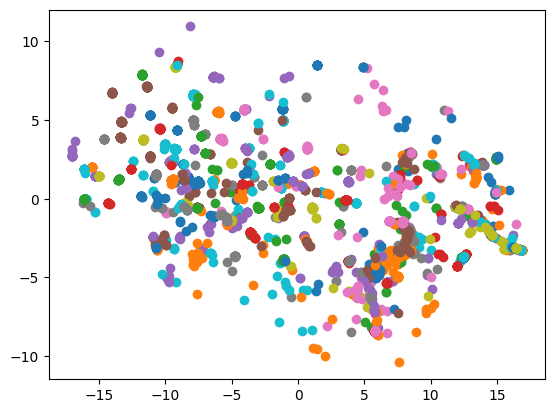

In [ ]:
loaded_w2v = Word2Vec.load("saved_models/re_model_year_{}.model".format(2023))
word_list = np.array(loaded_w2v.wv.most_similar("phase_transition", topn=200))[:,0]
sel_inx = [np.where(c_inx_arr==word_)[0] for word_ in word_list]
sel_inx = np.array([arr for arr in sel_inx if arr.size > 0])[:,0]

# sel_inx = np.random.randint(len(encoding_dat),size=100)
random_choice_encoding = c_encoding_arr[sel_inx]
random_choice_concepts = c_inx_arr[sel_inx]

y_arr = []
embed = TSNE(n_components=2, random_state=42, perplexity=10,n_iter=1000).fit(random_choice_encoding[:,0,:])
for inx in range(len(np.unique(year_arr))):
    Y = embed.transform(random_choice_encoding[:,inx,:])
    y_arr.append(Y)
    

y_arr = np.array(y_arr) 
for i in range(len(sel_inx)):
    plt.scatter(y_arr[:,i,0], y_arr[:,i,1])#, c=np.unique(year_arr))
    

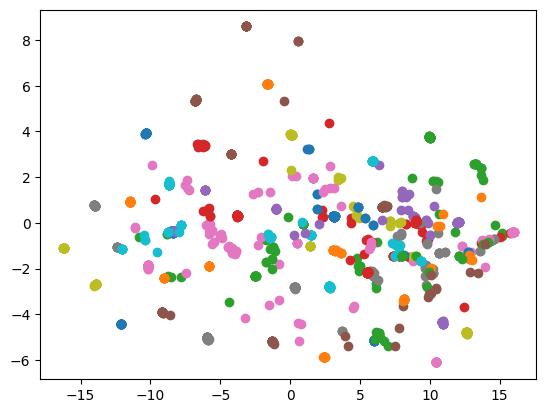

In [ ]:
sel_inx = np.random.randint(len(c_encoding_arr),size=50)
random_choice_encoding = c_encoding_arr[sel_inx]
random_choice_concepts = c_inx_arr[sel_inx]
y_arr = []
embed = TSNE(n_components=2, random_state=42, perplexity=5,n_iter=1000).fit(random_choice_encoding[:,0,:])
for inx in range(len(np.unique(year_arr))):
    Y = embed.transform(random_choice_encoding[:,inx,:])
    y_arr.append(Y)
    
y_arr = np.array(y_arr) 
for i in range(50):
    plt.scatter(y_arr[:,i,0], y_arr[:,i,1])#, c=np.unique(year_arr))

In [ ]:
# sel_inx = np.random.randint(len(c_encoding_arr),size=100)
# random_choice_encoding = c_encoding_arr[sel_inx]
# random_choice_concepts = c_inx_arr[sel_inx]

# Y = TSNE(n_components=2, random_state=42, perplexity=5,n_iter=100).fit(random_choice_encoding[:,0,:])

# plt.scatter(Y[:,0], Y[:,1], c=np.arange(100))

In [ ]:
# years, numpapers_y = np.unique(year_arr,return_counts=True)
# fig, ax = plt.subplots(figsize=(3.5,3))

# ax.plot( np.arange(len(numpapers_y))[:-1], numpapers_y[:-1], '-o', markersize=3 )
# ax.set_xticks( list(range(len(years))[::3]))
# ax.set_xticklabels( years[::3], rotation=45 )
# ax.set_yscale("log")

# ax2 = fig.add_axes([0.475, 0.25+0.1, 0.25+0.1, 0.25])
# ax2.plot(np.arange(len(numpapers_y))[:-1][::2], cumulative_sum[:-1][::2], '-o', markersize=3)

# ax2.set_xticks( list(range(len(years))[::5]))
# ax2.set_xticklabels( years[::5], rotation=45 )
# ax2.set_yscale("log")

# Most connected concepts

In [ ]:
# def replace_strings_with_indices(data, concept_to_index):
#     # Create a new dictionary to store the converted data
#     indexed_data = {}
    
#     # Iterate through the outer dictionary
#     for concept1, nested_dict in data.items():
#         # Replace the concept1 string with its index
#         # print(concept_to_index[concept1])
#         index1 = concept_to_index[concept1][0]
#         indexed_data[index1] = {}
        
#         # Iterate through the inner dictionary
#         for concept2, years in nested_dict.items():
#             # Replace the concept2 string with its index
            
#             index2 = concept_to_index[concept2][0]
#             indexed_data[index1][index2] = years
    
#     return indexed_data


# concept_to_indices = {concept: np.where(concept_filtered_arr == concept)[0] for concept in np.unique(concept_filtered_arr)}
# index_co_occurrences = replace_strings_with_indices(word_co_occurrences, concept_to_indices)

# def create_graph_from_dict(data):
#     # Create an empty graph
#     G = nx.Graph()
    
#     # Iterate through the outer dictionary
#     for concept1, nested_dict in data.items():
#         # Iterate through the inner dictionary
#         for concept2, years in nested_dict.items():
#             # If the edge already exists, add to the weight and append years
#             if G.has_edge(concept1, concept2):
#                 G[concept1][concept2]['weight'] += len(years)
#                 G[concept1][concept2]['years'].extend(years)
#             else:
#                 # Add a new edge with the weight and list of years
#                 G.add_edge(concept1, concept2, weight=len(years), years=years)
    
#     # Remove duplicate years
#     for u, v in G.edges():
#         G[u][v]['years'] = list(set(G[u][v]['years']))
    
#     return G

# def convert_years_to_days_since_1990(years):
#     base_date = datetime(1990, 1, 1)
#     days_since_1990 = [(datetime(year, 1, 1) - base_date).days for year in years]
#     return days_since_1990

# def save_graph_edges(graph, filename):
#     # Create a list of concepts and assign indices
#     concepts = list(graph.nodes())
#     concept_indices = {concept: idx for idx, concept in enumerate(concepts)}
    
#     # Create the edge list in the specified format
#     edge_list = []
#     for u, v, data in graph.edges(data=True):
#         idx1 = concept_indices[u]
#         idx2 = concept_indices[v]
#         years = data['years']
#         days = convert_years_to_days_since_1990(years)
#         for day in days:
#             edge_list.append([idx1, idx2, day])
    
#     # Save the edge list as a .pkl file
#     with open(filename, 'wb') as f:
#         pickle.dump(edge_list, f)


# graph = create_graph_from_dict(word_co_occurrences)
# save_graph_edges(graph, 'graph_edges.pkl')

# Print the edge list to verify
with open('saved_files/graph_edges.pkl', 'rb') as f:
    edge_list = pickle.load(f)
    print(edge_list[0])


graph = nx.Graph()
graph.add_weighted_edges_from(edge_list)


[0, 1, 11323]


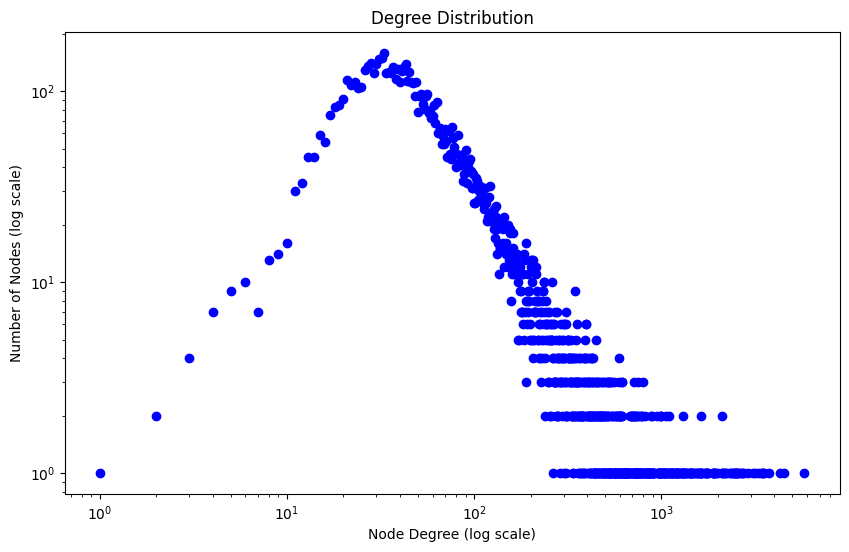

In [ ]:
# Step 2: Compute the degree of each node
from collections import Counter

degree_sequence = [d for n, d in graph.degree()]

# Step 3: Calculate the degree distribution
degree_count = Counter(degree_sequence)
degree, count = zip(*degree_count.items())

# Step 4: Plot the distribution with log scales on both axes
plt.figure(figsize=(10, 6))
plt.scatter(degree, count, c='blue')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Node Degree (log scale)')
plt.ylabel('Number of Nodes (log scale)')
plt.title('Degree Distribution')

# plt.grid(True, which="both", ls="--")
plt.show()

In [ ]:
# Find the top 20 nodes with the lowest and highest degrees
sorted_nodes_by_degree = sorted(graph.degree(), key=lambda x: x[1])

# Top 20 nodes with the lowest degrees
top_20_lowest_degree_nodes = sorted_nodes_by_degree[:10]

# Top 20 nodes with the highest degrees
top_20_highest_degree_nodes = sorted_nodes_by_degree[-200:][::-1]

print("Highest Degree")
for c,cnt in top_20_highest_degree_nodes:
    
    print(c_inx_arr[c], cnt)

print("Lowest Degree")
for c,cnt in top_20_lowest_degree_nodes:
    print(c_inx_arr[c], cnt)



# # Step 3: Calculate the degree distribution
# degree_count = Counter(degree_sequence)
# degree, count = zip(*degree_count.items())

Highest Degree
adiabatic_quantum_evolution 5802
auto_correlation 4538
atomic_collective_excitation 4294
abstract_model 3740
abelian_subgroup 3546
ab_initio 3475
atomic_beam 3459
arithmetic_operation 3411
belief_propagation_decoding 3300
angular_momentum_theory 3181
absorbing_boundary_condition 3069
adiabatic_transport 2895
atomic_thermal_motion 2776
chromatic_dispersion 2704
adiabatic_method 2680
average_photon_number 2658
artificial_intelligence 2599
achievable_efficiency 2551
antiferromagnetic_chain 2534
asymptotic_convergence 2512
bistable_behavior 2505
coherence_transfer 2502
analytic_representation 2469
base_field 2437
classification_performance 2400
breit_wigner 2370
bessel_beam 2365
analytical_solution 2311
carbon_nanotube 2238
amplitude_estimation_algorithm 2187
bacon_shor_code 2180
blind_quantum_computing 2140
adjacency_matrix 2105
action_integral 2105
basis_set 2103
action_angle 2095
biological_molecule 1997
adiabatic_preparation 1964
combinatorial_optimization 1927
adiabatic

In [ ]:
def similarity_cosine(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

def cosine_distance(v1, v2):
    return 1-similarity_cosine(v1, v2)

# word_list = ["entangled_state",
#              "magnetic_field",
#              "ground_state",
#              "quantum_correlation",
#              "phase_transition",
#              "bell_inequality",
#              "non_trivial", 
#              "ab_initio", 
#              "thermalization"
#              ]

word_list = ["artificial_intelligence",
"adiabatic_preparation",
"carbon_nanotube",
"combinatorial_optimization",
"laser_light",
"adversarial_attack",
"coherence_measurement",
"cauchy_schwarz_inequality",
"adiabatic_quantum_evolution",
"bayesian_filter",
"bipartite_quantum_system",
"auto_correlation",
"adiabatic_method",
"antiferromagnetic_chain",
"analytic_representation",
"classification_performance",
]


# Initialize lists to track the top 20 increases and decreases
top_increase_total_concepts = [[] for _ in range(len(word_list))]
top_decrease_total_concepts = [[] for _ in range(len(word_list))]
top_increase_relative_concepts = [[] for _ in range(len(word_list))]
top_decrease_relative_concepts = [[] for _ in range(len(word_list))]

for cnt, c_1 in tqdm(enumerate(word_list)):
    print("Currently:", c_1)
    _inx_1 = np.where(c_inx_arr == c_1)[0]
    for _inx_2, c_2 in enumerate(c_inx_arr):
        _inx_2 = np.array([_inx_2])
        
        encoding1 = c_encoding_arr[_inx_1][0]
        encoding2 = c_encoding_arr[_inx_2][0]
        
        # Compute cosine similarities for each year
        similarity_per_year = [cosine_distance(v1, v2) for (v1, v2) in zip(encoding1, encoding2)]

        # distance_change = similarity_per_year[-1] - similarity_per_year[len(similarity_per_year)//2] 
        distance_change = np.max(similarity_per_year) - np.min(similarity_per_year)
        
        relative_change = distance_change / similarity_per_year[0] if similarity_per_year[0] != 0 else 0  # Avoid division by zero

        # Update top increase/decrease concepts if applicable
        if len(top_increase_total_concepts[cnt]) < 30:
            top_increase_total_concepts[cnt].append((c_1, c_2, distance_change))
            top_decrease_total_concepts[cnt].append((c_1, c_2, distance_change))
            top_increase_relative_concepts[cnt].append((c_1, c_2, relative_change))
            top_decrease_relative_concepts[cnt].append((c_1, c_2, relative_change))
        else:
            top_increase_total_concepts[cnt].sort(key=lambda x: x[2], reverse=True)
            top_decrease_total_concepts[cnt].sort(key=lambda x: x[2])
            top_increase_relative_concepts[cnt].sort(key=lambda x: x[2], reverse=True)
            top_decrease_relative_concepts[cnt].sort(key=lambda x: x[2])
            
            if distance_change > top_increase_total_concepts[cnt][-1][2]:
                top_increase_total_concepts[cnt][-1] = (c_1, c_2, distance_change)
            if distance_change < top_decrease_total_concepts[cnt][-1][2]:
                top_decrease_total_concepts[cnt][-1] = (c_1, c_2, distance_change)
            if relative_change > top_increase_relative_concepts[cnt][-1][2]:
                top_increase_relative_concepts[cnt][-1] = (c_1, c_2, relative_change)
            if relative_change < top_decrease_relative_concepts[cnt][-1][2]:
                top_decrease_relative_concepts[cnt][-1] = (c_1, c_2, relative_change)

# After the loop, ensure the final top 20 lists are sorted correctly
for i in range(len(word_list)):
    top_increase_total_concepts[i] = sorted(top_increase_total_concepts[i], key=lambda x: x[2], reverse=True)[:20]
    top_decrease_total_concepts[i] = sorted(top_decrease_total_concepts[i], key=lambda x: x[2])[:20]
    top_increase_relative_concepts[i] = sorted(top_increase_relative_concepts[i], key=lambda x: x[2], reverse=True)[:20]
    top_decrease_relative_concepts[i] = sorted(top_decrease_relative_concepts[i], key=lambda x: x[2])[:20]

# Now `top_increase_total_concepts`, `top_decrease_total_concepts`, `top_increase_relative_concepts`, and `top_decrease_relative_concepts`
# will contain the top 20 increases and decreases for each concept pair.


0it [00:00, ?it/s]

Currently: artificial_intelligence


1it [00:01,  1.78s/it]

Currently: adiabatic_preparation


2it [00:03,  1.66s/it]

Currently: carbon_nanotube


3it [00:05,  1.71s/it]

Currently: combinatorial_optimization


4it [00:06,  1.68s/it]

Currently: laser_light


5it [00:08,  1.70s/it]

Currently: adversarial_attack


6it [00:10,  1.64s/it]

Currently: coherence_measurement


7it [00:11,  1.64s/it]

Currently: cauchy_schwarz_inequality


8it [00:13,  1.61s/it]

Currently: adiabatic_quantum_evolution


9it [00:14,  1.59s/it]

Currently: bayesian_filter


10it [00:16,  1.56s/it]

Currently: bipartite_quantum_system


11it [00:17,  1.53s/it]

Currently: auto_correlation


12it [00:19,  1.54s/it]

Currently: adiabatic_method


13it [00:20,  1.53s/it]

Currently: antiferromagnetic_chain


14it [00:22,  1.54s/it]

Currently: analytic_representation


15it [00:23,  1.57s/it]

Currently: classification_performance


16it [00:25,  1.60s/it]


In [ ]:
# Print top 10 concepts with the largest increase and decrease in distance
print("Top 10 concepts with the largest total increase in distance:")
for con in top_increase_total_concepts:
    for concept in con:
        print(f"Concept pair: {concept[0]}, {concept[1]}, Distance change: {concept[2]:.2f}")

print("\nTop 10 concepts with the largest total decrease in distance:")
for con in top_decrease_total_concepts:
    for concept in con:
        print(f"Concept pair: {concept[0]}, {concept[1]}, Distance change: {concept[2]:.2f}")
# Print top 10 concepts with the largest increase and decrease in distance
# print("Top 10 concepts with the largest relative increase in distance:")

# for con in top_increase_relative_concepts:
#     for concept in con:
#         print(f"Concept pair: {concept[0]}, {concept[1]}, Distance change: {concept[2]:.2f}")

# print("\nTop 10 concepts with the largest relative decrease in distance:")
# for con in top_decrease_relative_concepts:
#     for concept in con:
#         print(f"Concept pair: {concept[0]}, {concept[1]}, Distance change: {concept[2]:.2f}")

Top 10 concepts with the largest total increase in distance:
Concept pair: artificial_intelligence, np_problem, Distance change: 1.43
Concept pair: artificial_intelligence, xor_gate, Distance change: 1.41
Concept pair: artificial_intelligence, extended_hilbert_space, Distance change: 1.35
Concept pair: artificial_intelligence, quantum_robot, Distance change: 1.35
Concept pair: artificial_intelligence, n_dimensional_space, Distance change: 1.32
Concept pair: artificial_intelligence, spin_coherent_state, Distance change: 1.31
Concept pair: artificial_intelligence, shannon_information, Distance change: 1.29
Concept pair: artificial_intelligence, boolean_logic, Distance change: 1.27
Concept pair: artificial_intelligence, halting_problem, Distance change: 1.27
Concept pair: artificial_intelligence, tensor_power, Distance change: 1.25
Concept pair: artificial_intelligence, dirac_particle, Distance change: 1.25
Concept pair: artificial_intelligence, square_integrable_function, Distance change

In [ ]:
stop

In [ ]:
# def test_pair(c1,c2):
#     inx1 = np.where(c_inx_arr==c1)[0]
#     inx2 = np.where(c_inx_arr==c2)[0]
#     return  [cosine_distance(c_encoding_arr[inx1][0][i],c_encoding_arr[inx2][0][i]) for i,year in enumerate(np.unique(year_arr))]

# plt.plot(test_pair("entangled_state" , "von_neumann_entropy"))


In [ ]:
# def cosine_distance(A, B):
#     # Compute the dot product between A and B
#     dot_product = np.dot(A, B)
    
#     # Compute the L2 norms (magnitudes) of A and B
#     norm_A = np.linalg.norm(A)
#     norm_B = np.linalg.norm(B)
    
#     # Compute the cosine similarity
#     cosine_similarity = dot_product / (norm_A * norm_B)
    
#     # Compute the cosine distance
#     cosine_distance = 1 - cosine_similarity
    
#     return cosine_distance




data_dict = {
    "entangled_state":{"bell_measurement":{},"tripartite_quantum_state":{},"resonance_interaction":{},"positive_lyapunov_exponent":{},"liouville_equation":{},"noether_theorem":{}},
    "magnetic_field":{"drift_velocity":{},"conserved_quantity":{},"spin_coupling":{},"jacobi_matrix":{},"schroedinger_operator":{},"toffoli_gate":{}},
    "ground_state":{"excitation_gap":{},"slater_determinant":{},"matrix_product_state_representation":{},"deformation_quantization":{},"reversible_computing":{},"logic_gate":{}},
    "quantum_correlation":{"gaussian_quantum_discord":{},"jaynes_principle":{},"quantum_indistinguishability":{},"variational_principle":{},"superconducting_circuit":{},"differential_equation":{}},
    "phase_transition":{"quantum_defect":{},"quantum_defect":{},"quantum_zeno_effect":{},"modular_exponentiation":{},"group_transformation":{},"ladder_operator":{}},
    "bell_inequality":{"maximal_quantum_violation":{},"multiple_system":{},"quantum_non_locality":{},"heterodyne_detection_scheme":{},"mode_squeezing":{},"phase_space":{}},
}

for concept_1, dict_1 in data_dict.items():
    selw_inx = np.where(c_inx_arr==concept_1)[0]
    for concept_2, dict_2 in dict_1.items():
        
        selc_inx = np.where(c_inx_arr==concept_2)[0]

        try:
            data_dict[concept_1][concept_2] = {year:cosine_distance(c_encoding_arr[selw_inx][0][i],c_encoding_arr[selc_inx][0][i]) for i,year in enumerate(np.unique(year_arr))}
        except:
            print(concept_1,concept_2,"fails")
            

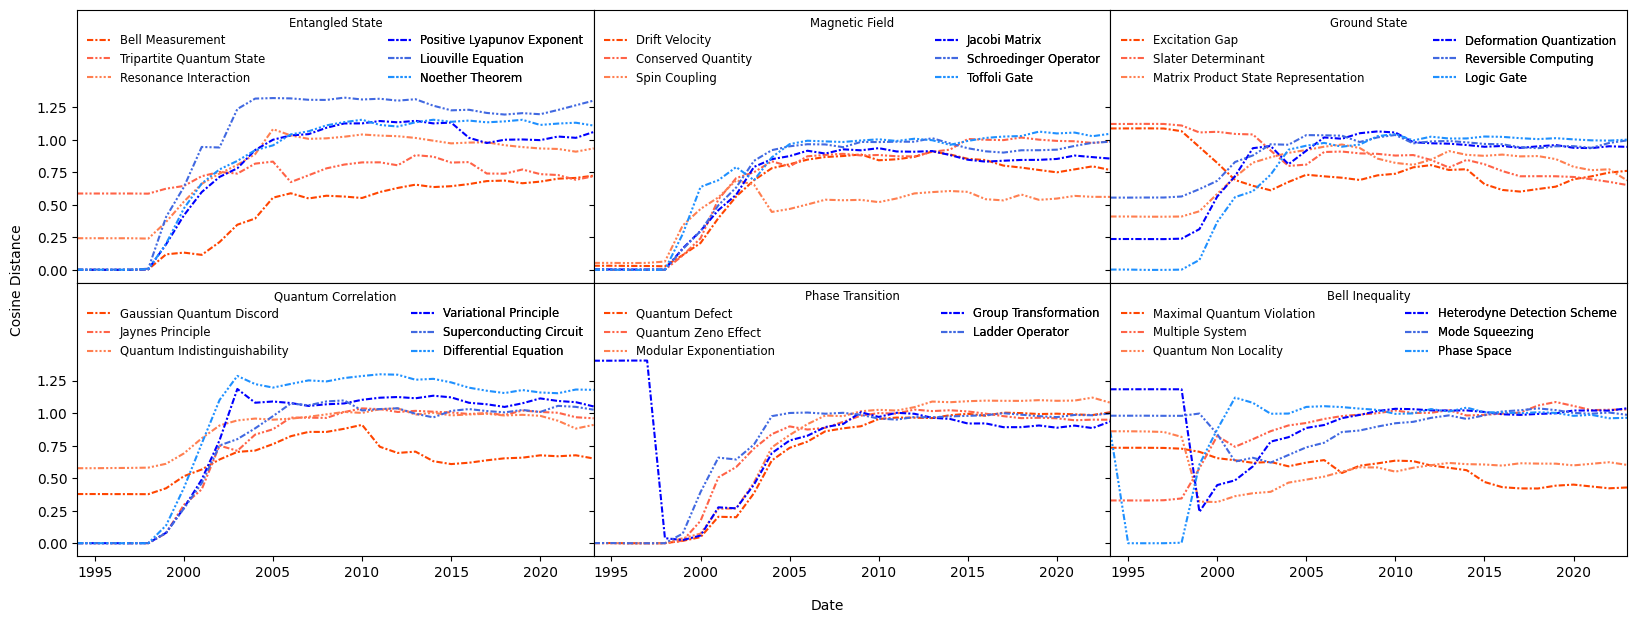

In [ ]:
# Define colors
red_hues = ['#FF4500', '#FF6347', '#FF7F50', '#FF8C00', '#FFA07A']
blue_hues = ['#0000FF', '#4169E1', '#1E90FF', '#00BFFF', '#87CEFA']

linestyles = [
    (0, (3, 1, 1, 1)),         # dash dot dash
    (0, (3, 1, 1, 1, 1, 1)),   # dash dot dot dash
    (0, (3, 1, 1, 1, 1, 1, 1, 1)), # dash dot dot dot dash
    (0, (3, 1, 1, 1, 1, 1, 1, 1, 1, 1)), # dash dot dot dot dot dash
    (0, (3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1))  # dash dot dot dot dot dot dash
]

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 7.1), sharex=True, sharey=True)
axes = axes.flatten()

main_words = list(data_dict.keys())
years = sorted(list(data_dict[main_words[0]][list(data_dict[main_words[0]].keys())[0]].keys()))

for i, main_word in enumerate(main_words):
    ax = axes[i]
    red_lines = []
    blue_lines = []
    for j, (related_word, distances) in enumerate(data_dict[main_word].items()):
        distances_over_time = [distances[year] for year in years]
        color = red_hues[j % 3] if j < 3 else blue_hues[j % 3]
        linestyle = linestyles[j % 3] 
        
        label = related_word
        line, = ax.plot(years, distances_over_time, color=color, linestyle=linestyle, label=label)
        
        if j < 3:
            red_lines.append(line)
        else:
            blue_lines.append(line)
    
    ax.text(0.5, 0.975, main_word.replace("_"," ").title(), horizontalalignment='center', verticalalignment='top', transform=ax.transAxes, fontsize="small")#, bbox=dict(facecolor='lightblue', alpha=0.5))
    ax.set_ylim(0, 1)
    ax.set_xlim(min(years), max(years))
    
    red_legend_handles = [Line2D([0], [0], color=red_hues[j % 3], linestyle=linestyles[j % 3], label=related_word.replace("_"," ").title() )
                          for j, related_word in enumerate(data_dict[main_word].keys()) if j < 3]

    blue_legend_handles = [Line2D([0], [0], color=blue_hues[j % 3], linestyle=linestyles[j % 3], label=related_word.replace("_"," ").title())
                           for j, related_word in enumerate(data_dict[main_word].keys()) if j >= 3]
    
    red_legend = ax.legend(handles=red_legend_handles, loc='upper left', fontsize='small',frameon=False,bbox_to_anchor=(0, 0.95))
    blue_legend = ax.legend(handles=blue_legend_handles, loc='upper right', fontsize='small',frameon=False, bbox_to_anchor=(1, 0.95))
    ax.add_artist(red_legend)
    ax.add_artist(blue_legend)
    ax.set_ylim([-0.1,2])
    ax.set_yticks([0,0.25,0.50,0.75,1,1.25])
    # ax.set_yscale("log")
    

fig.text(0.5, 0.04, 'Date', ha='center', va='center')
fig.text(0.095, 0.5, 'Cosine Distance', ha='center', va='center', rotation='vertical')
# fig.suptitle('Cosine Distances of Words Over Time', fontsize=16)

# Adjust layout to remove gaps
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()
